## I have made an FIR and IIR filter

### I compare them here

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import soundfile as sf
from IPython.display import Audio, display

In [60]:
class iir_filt:
        
    
    def __init__(self, cutoff, slope, M, samplerate, passes=1, style='bandpass'):
        self.cutoff = cutoff
        self.slope = slope
        
        self.M = M
        #keep it odd
        if self.M % 2 == 0:
            self.M += 1
            
        self.samplerate = samplerate
        self.passes = passes
        self.style = style
        
        self.window = self.make_window()
        
        self.i_r = np.fft.ifft(self.window)
        
        #take values from self.ir
        self.B = np.real(np.append(self.i_r[len(self.i_r)-(self.M//2):], self.i_r[:self.M//2+1]))

        #self.B = np.real(self.i_r[:self.M])
        
        return
    
    def process(self, signal):
        
        #suptract window from allpass if necessary
        if self.style == 'highpass' or self.style == 'bandstop':
            allpass = np.append(np.full(self.M//2, 0), .5)
            allpass = np.append(allpass, np.full(self.M//2, 0))
            self.B = allpass - self.B
        
        
        
        output = np.full(len(signal), 0.0)

        Q = 4
        a = self.B
        self.b = [1, 1, 1, 1] #np.real(normalize(self.i_r)[:Q])  #1.5 - np.arange(0.5, 1, .5/Q)
        plt.plot(a)
        plt.show()
        #self.B = normalize(self.B)
        print(a)
       
        #now to re-write more consicly
        
        for N in range(self.M, len(signal)):
            
            output[N] = self.B[0] * signal[N]
            for K in range(1, self.M):
                
                feedback = (a[K] * output[N-K] if K < Q else 0)
                #if K < Q:
                    #print('values a[K] {}, output[N-K] {} feedback {}'.format(a[K], output[N-K], feedback))
                
                output[N] += (self.B[K] * signal[N - K]) - feedback
                
            #this makes the whole thing shrink and shrink and shrink
            #print('output{}, a[0] {}'.format(output[N], a[0]))
            output[N] /= a[0]
            
            #print(1/a[0])
        #output /= a[0]
            
        return output
    
    def make_window(self):
        '''
        converts the given values into a window based on hanning
        
        current bandp and band s ar uninterupted curves
        
        also lp and hp are all curves
        
        need another arg?
        '''
        if self.style == 'bandpass':
            window = np.append(np.full(self.cutoff - (self.slope), 0), np.hanning(self.slope*2))
            window = np.append(window, np.full(self.samplerate-(self.cutoff - (self.slope)), 0))           
            
        elif self.style == 'bandstop':
            window = np.append(np.full(self.cutoff - (self.slope), 0), np.hanning(self.slope*2))
            window = np.append(window, np.full(self.samplerate-(self.cutoff - (self.slope)), 0))  
                               
        elif self.style == 'lowpass':
            window = np.append(np.full(self.cutoff, 1), np.hanning(self.slope*2)[self.slope:])
            window = np.append(window, np.full(self.samplerate - self.cutoff - self.slope, 0))
            
        elif self.style == 'highpass':
            window = np.append(np.full(self.cutoff, 1), np.hanning(self.slope*2)[self.slope:])
            window = np.append(window, np.full(self.samplerate - self.cutoff - self.slope, 0))

        return window
        
    def print_window(self):
        """
        prints the window, its impules responce and its freq resonce
        """
        plt.figure(figsize=(6,2))
        plt.subplot(121)
        plt.plot(self.window[:self.samplerate])
        plt.title('Ideal responce of the filter')
        plt.xlabel('Frequency')
        plt.ylabel('Gain')
        #plt.show()
        
        plt.subplot(122)
        #i_r = np.fft.ifft(self.window)
        plt.plot(self.B)
        plt.show()
        
        return

In [61]:
class fir_filt:
    
    def __init__(self, cutoff, slope, M, samplerate, passes=1, style='bandpass'):
        self.cutoff = cutoff
        self.slope = slope
        
        self.M = M
        #keep it odd
        if self.M % 2 == 0:
            self.M += 1
            
        self.samplerate = samplerate
        self.passes = passes
        self.style = style
        
        self.window = self.make_window()
        
        self.i_r = np.fft.ifft(self.window)
        
        #take values from self.ir
        self.B = np.real(np.append(self.i_r[len(self.i_r)-(self.M//2):], self.i_r[:self.M//2+1]))

        
        return
    
    def process(self, signal):
        
        if self.style == 'highpass' or self.style == 'bandstop':
            allpass = np.append(np.full(self.M//2, 0), .5)
            allpass = np.append(allpass, np.full(self.M//2, 0))
            self.B = allpass - self.B
            
        output = np.full(len(signal), 0.0)
        
        for N in range(self.M, len(signal)):
            for K in range(self.M):
                output[N] += self.B[K] * signal[N - K]

        return output
    
    

    
    def make_window(self):
        '''
        converts the given values into a window based on hanning
        
        current bandp and band s ar uninterupted curves
        
        also lp and hp are all curves
        
        need another arg?
        '''
        if self.style == 'bandpass':
            window = np.append(np.full(self.cutoff - (self.slope), 0), np.hanning(self.slope*2))
            window = np.append(window, np.full(self.samplerate-(self.cutoff - (self.slope)), 0))           
            
        elif self.style == 'bandstop':
            window = np.append(np.full(self.cutoff - (self.slope), 0), np.hanning(self.slope*2))
            window = np.append(window, np.full(self.samplerate-(self.cutoff - (self.slope)), 0))  
                               
        elif self.style == 'lowpass':
            window = np.append(np.full(self.cutoff, 1), np.hanning(self.slope*2)[self.slope:])
            window = np.append(window, np.full(self.samplerate - self.cutoff - self.slope, 0))
            
        elif self.style == 'highpass':
            window = np.append(np.full(self.cutoff, 1), np.hanning(self.slope*2)[self.slope:])
            window = np.append(window, np.full(self.samplerate - self.cutoff - self.slope, 0))
        
        return window
        
    def print_window(self):
        """
        prints the window, its impules responce and its freq resonce
        """
        plt.figure(figsize=(6,2))
        plt.subplot(121)
        plt.plot(self.window[:self.samplerate])
        plt.title('Ideal responce of the filter')
        plt.xlabel('Frequency')
        plt.ylabel('Gain')
        #plt.show()
        
        plt.subplot(122)
        #i_r = np.fft.ifft(self.window)
        plt.plot(self.B)
        plt.show()
        
        return
    
        
    def set_cuttoff(self, val):
        self.cutoff = val
    
    def set_M(self, val):
        self.M = val
        
    def set_slope(self, val):
        self.slope = val
        
    def set_passes(self, val):
        self.passes = val
    
  

In [62]:
def plot_fft(signal, signal2, samplerate):
    plt.figure(figsize=(6,2))
    
    # Plot frequency response (in dB).
    signal = np.abs(np.fft.fft(signal))[:len(signal)//2]
    plt.plot(np.linspace(0, samplerate//2, len(signal)),  signal)

    signal2 = np.abs(np.fft.fft(signal2))[:len(signal2)//2]
    plt.plot(np.linspace(0, samplerate//2, len(signal)),  0-signal2)
    
    plt.xlabel('Normalized frequency')
    plt.ylabel('Gain [dB]')
    #plt.ylim([-100, 10])
    plt.grid()
    plt.show()



In [63]:
def normalize(signal):

    highest = 0
    for i in range(len(signal)):
        if np.abs(signal[i]) > highest:
            highest = np.abs(signal[i])
    
    return signal / highest
    
    


LOWPASS: cutoff=100, slope=1000,


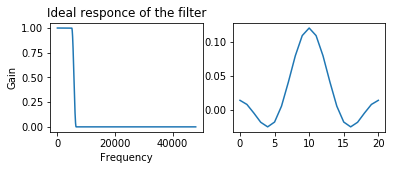

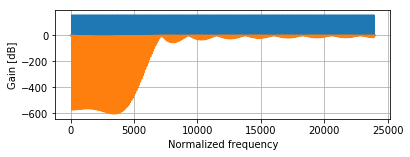

In [64]:
# here i make a white noise to measure real responce against
w_noise, samplerate = sf.read('noise.wav')

w_noise = normalize(w_noise)

print('LOWPASS: cutoff=100, slope=1000,')
fir_filter = fir_filt(cutoff=5000, slope=1500, M=20, passes = 2, samplerate=samplerate, style='lowpass')
fir_filter.print_window()

signal = normalize(fir_filter.process(w_noise))
plot_fft(w_noise, signal, samplerate)




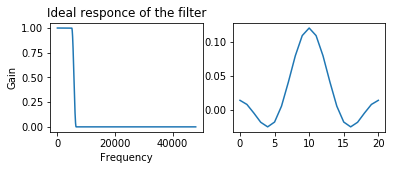

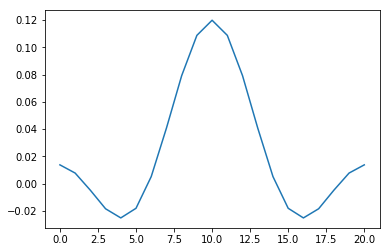

[ 0.01374687  0.00773416 -0.00485857 -0.01845617 -0.02515853 -0.01809866
  0.00514375  0.04069402  0.07912711  0.1086969   0.11978646  0.1086969
  0.07912711  0.04069402  0.00514375 -0.01809866 -0.02515853 -0.01845617
 -0.00485857  0.00773416  0.01374687]


/home/billy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: overflow encountered in double_scalars
/home/billy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in double_scalars
/home/billy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


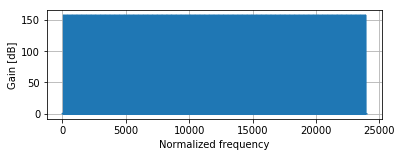

In [65]:
# here i make a white noise to measure real responce against
w_noise, samplerate = sf.read('noise.wav')

w_noise = normalize(w_noise)
    
    
iir_filter = iir_filt(cutoff=5000, slope=1500, M=20, passes = 1, samplerate=samplerate, style='lowpass')
iir_filter.print_window()

iir_signal = normalize(iir_filter.process(w_noise))
plot_fft(w_noise, iir_signal, samplerate)